In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer

# Cross Validation

In this lab we look at using cross validation, which helps against overfitting and generalisation. For this we use sklearn functions that make this process very easy.

## Reading the data

The data is provided in a cleaned format so we can directly load and use it.

In [4]:
data = pd.read_csv('./data/encoded_car_data.csv')
X = data.drop(columns=['price'])
y = data['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Ex1

Comparing standardisation with normalisation

In [8]:
pipe_standard = Pipeline([
    ('pre', StandardScaler()),
    ('regression', LinearRegression()),
])

pipe_norm = Pipeline([
    ('pre', Normalizer()),
    ('regression', LinearRegression()),
])

pipe_norm.fit(X_train, y_train)
pipe_standard.fit(X_train, y_train)

y_pred_train_norm = pipe_norm.predict(X_train)
y_pred_train_stand = pipe_standard.predict(X_train)
y_pred_norm = pipe_norm.predict(X_test)
y_pred_standard = pipe_standard.predict(X_test)

pd.DataFrame(
    {
        'R^2 train': {'norm': pipe_norm.score(X_train, y_train), 'stand': pipe_standard.score(X_train, y_train)},
        'R^2 test': {'norm': pipe_norm.score(X_test, y_test), 'stand': pipe_standard.score(X_test, y_test)},
        'RMSE train': {'norm': mean_squared_error(y_train, y_pred_train_norm), 'stand': mean_squared_error(y_train, y_pred_train_stand)},
        'RMSE test': {'norm': mean_squared_error(y_test, y_pred_norm), 'stand': mean_squared_error(y_test, y_pred_standard)}
    }
)

,R^2 train,R^2 test,RMSE train,RMSE test
norm,0.926460,0.875579,4.482255e+06,8.620459e+06
stand,0.926272,0.841917,4.493680e+06,1.095265e+07


## Best feature

We can also evaluate single features, which may give some insight into which feature can explain most of our data. Let's compare this with and without standardisation.

In [21]:
R_2 = {'scaled': [], 'non-scaled': []}
features = list(X)

pipe = Pipeline([('regression', LinearRegression())])
pipe_scaled = Pipeline([('scale', StandardScaler()), ('regression', LinearRegression())])

for feature in features:
    pipe.fit(X_train[[feature]], y_train)
    pipe_scaled.fit(X_train[[feature]], y_train)
    R_2['non-scaled'].append(pipe.score(X_train[[feature]], y_train))
    R_2['scaled'].append(pipe_scaled.score(X_train[[feature]], y_train))
    
print(features[np.argmax(R_2['scaled'])], features[np.argmax(R_2['non-scaled'])])

enginesize enginesize


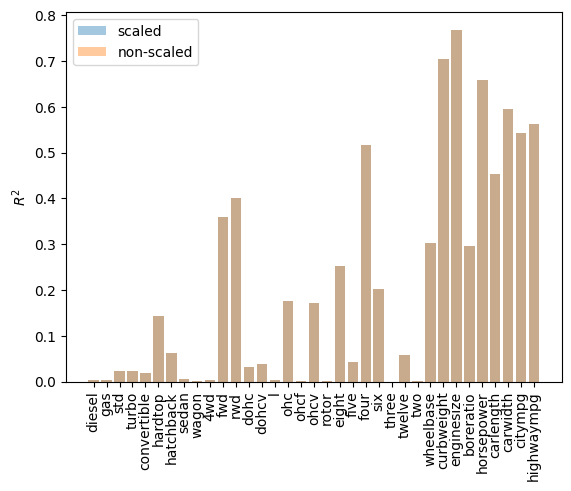

In [19]:
plt.bar(features, R_2['scaled'], label='scaled', alpha=0.4)
plt.bar(features, R_2['non-scaled'], label='non-scaled', alpha=0.4)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend();

## Cross Validation Score

Sklearn makes cross validation easy with the `cross_val_score` function. This runs CV and shows return performance.

Common scoring functions are directly included, as is KFold validation. For this simply specify as input arguments.

In [23]:
N = len(X)
lr = LinearRegression()
scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
scores

array([-9.95594669e+06, -1.28998404e+08, -9.38979729e+06, -3.16868360e+07,
       -3.09072315e+07])